# Using Builtin Collections

One of the most useful things that ``cluster_generator`` provides is our ``collections`` module, which allows the user to access a variety of pre-existing cluster models from a variety of
popular pieces of literature. Furthermore, the user can create and save their own collections to have easy access to their preferred clusters directly from the commandline. In this guide,
we'll walk through all of the things you need to know about the collections module.

---

## Contents

- [What is a Collection?](#What-Is-a-Collection)

---

## What is a Collection

``ClusterCollection`` objects are the core class of the builtin clusters implementation. Each ``ClusterCollection`` takes only one argument to initialize: ``path``, which is the path to the correct ``.yaml`` file
holding the underlying data. If you're interested in the development side of this (say if you want to build your own), then see the Collections page from the main menu. In some cases, additional classes are available which inherit from
``ClusterCollection``. These objects represent builtin datasets that can be accessed. Let's see just one of them right away.

In [2]:
import cluster_generator as cg
from cluster_generator.collection import Vikhlinin06

# -- Initializing the collection -- #
v = Vikhlinin06.load()


✔ cluster_generator : [INFO     ] Mon Aug 28 17:19:44 2023 Loading collect (...)⠙ cluster_generator : [INFO     ] Mon Aug 28 17:19:44 2023 Loading collect (...) cluster_generator : [INFO     ] Mon Aug 28 17:19:44 2023 Loaded collection Vikhlinin et. al. 2006


Once loaded, you can start looking at all of the various attributes these objects get. In the next code block, we show off a few of the most important: 

In [2]:
# -- print the object -- #
print(v)

# -- look at the available items -- #
print(f"Available clusters: {v.names}")

# -- what are the profiles? -- #
print(f"Profiles: {v.profiles}")

# -- individual fits -- #
print(f"The parameters for {v.names[1]} are {v.objs[v.names[1]]}")

ClusterCollection; name = Vikhlinin et. al. 2006, length = 13.
Available clusters: ['A133', 'A262', 'A383', 'A478', 'A907', 'A1413', 'A1795', 'A1991', 'A2029', 'A2390', 'RX J1159+5531', 'MKW 4', 'USGC S152']
Profiles: {'density': <function vikhlinin_density_profile at 0x7fa21e3611f0>, 'temperature': <function vikhlinin_temperature_profile at 0x7fa21e361280>}
The parameters for A262 are {'Name': 'A262', 'r_det': 450, 'r_min': 10, 'z': 0.0162, 'rho_0': 91429, 'r_c': 70.7, 'r_s': 365.6, 'alpha': 1.712, 'beta': 0.345, 'epsilon': 1.76, 'gamma': 3, 'T0': 2.42, 'rt': 350, 'a': -0.02, 'b': 5.0, 'c': 1.1, 'Tmin': 1.5488, 'r_cool': 19, 'a_cool': 5.25}


So all of the data we might want is right there, but cluster collections can do even more. Let's look at the ``load_model`` method:

```python
def load_model(self,model_name,r_min,r_max,num_points=1000,gravity="Newtonian",**kwargs):
    """
    Loads the model with name ``model_name``.

    Parameters
    ----------
    model_name: str
        The name of the model to load.
    r_min: float
        The minimum radius at which to load.
    r_max: float
        The maximum radius at which to load.
    num_points: int
        The number of constituent points to use.
    gravity: str
        The gravity theory to use.
    **kwargs
        additional parameters to pass through the loading system.

    Returns
    -------
    ClusterModel
        The finished cluster model.
    """
```
Now, for **some datasets**, there are slimmed down ``load_model`` methods which fill in some of these arguments. For example, with the ``Vikhlinin06`` class, the same function looks like this

```python
def load_model(self,model_name,r_min=None,r_max=None,num_points=1000,gravity="Newtonian",**kwargs):
    """
    Loads the model with name ``model_name``.

    Parameters
    ----------
    model_name: str
        The name of the model to load.
    r_min: float, optional. 
        The minimum radius at which to load. Defaults to ``rmin`` field in dataset.
    r_max: float, optional.
        The maximum radius at which to load. Defaults to ``r_det`` field.
    num_points: int
        The number of constituent points to use.
    gravity: str
        The gravity theory to use.
    **kwargs
        additional parameters to pass through the loading system.

    Returns
    -------
    ClusterModel
        The finished cluster model.
    """
```
so we can load these a bit easier:

cluster_generator : [INFO     ] 2023-08-28 17:18:45,343 Constructing ClusterModel. Method='from_dens_and_temp', gravity=Newtonian.
✔ cluster_generator : [INFO     ] Mon Aug 28 17:18:45 2023 Dyn. Mass comp; (...)⠙ cluster_generator : [INFO     ] Mon Aug 28 17:18:45 2023 Dyn. Mass comp; (...) cluster_generator : [INFO     ] Mon Aug 28 17:18:45 2023 Dyn. Mass comp: [DONE]
cluster_generator : [INFO     ] 2023-08-28 17:18:45,719 ClusterModel [ClusterModel object; gravity=Newtonian] has no virialization method. Setting to default = lma
cluster_generator : [INFO     ] 2023-08-28 17:18:45,721 Computing gravitational potential of ClusterModel object; gravity=Newtonian. gravity=Newtonian.


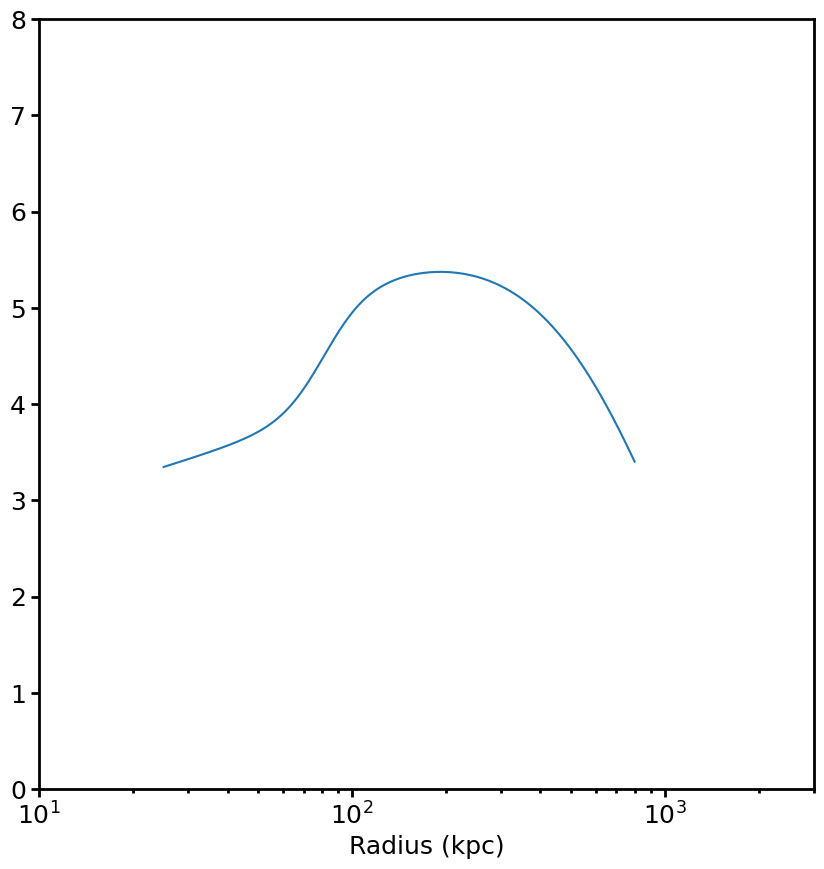

In [3]:
abell_383 = v.load_model("A383")

import matplotlib.pyplot as plt

abell_383.plot("temperature")
plt.yscale("linear")
plt.ylim([0,8])
plt.xlim([10,3000])
plt.show()

One can easily verify that this temperature profile matches that of the original paper! We can also do more complex things. For example:


cluster_generator : [INFO     ] 2023-08-28 17:16:33,754 Constructing ClusterModel. Method='from_dens_and_temp', gravity=Newtonian.
✔ cluster_generator : [INFO     ] Mon Aug 28 17:16:34 2023 Dyn. Mass comp; (...)⠙ cluster_generator : [INFO     ] Mon Aug 28 17:16:34 2023 Dyn. Mass comp; (...) cluster_generator : [INFO     ] Mon Aug 28 17:16:34 2023 Dyn. Mass comp: [DONE]
cluster_generator : [INFO     ] 2023-08-28 17:16:34,222 ClusterModel [ClusterModel object; gravity=Newtonian] has no virialization method. Setting to default = lma
cluster_generator : [INFO     ] 2023-08-28 17:16:34,224 Computing gravitational potential of ClusterModel object; gravity=Newtonian. gravity=Newtonian.
cluster_generator : [INFO     ] 2023-08-28 17:16:35,615 Constructing ClusterModel. Method='from_dens_and_temp', gravity=Newtonian.
✔ cluster_generator : [INFO     ] Mon Aug 28 17:16:36 2023 Dyn. Mass comp; (...)⠙ cluster_generator : [INFO     ] Mon Aug 28 17:16:36 2023 Dyn. Mass comp; (...) cluster_generator : 

(10, 3000)

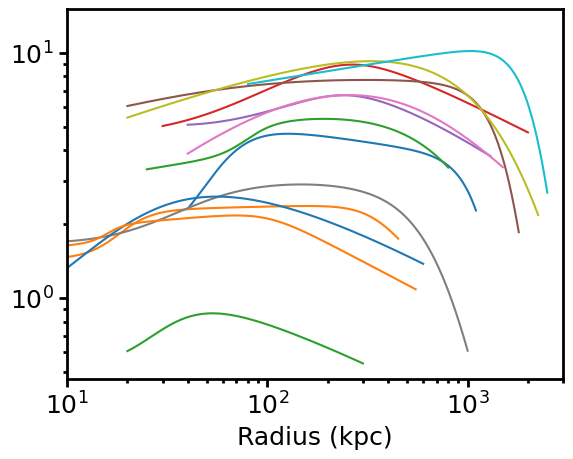

In [4]:
fig,ax = plt.subplots(1,1)

for n in v.names:
    m = v.load_model(n)
    m.plot("temperature",fig=fig,ax=ax)

ax.set_ylim([0,15])
ax.set_xlim([10,3000])

---

## IO Management

---

We've seen what more-or-less constitutes the entire idea behind the ``collection`` module, but there are a few other useful things to mention regarding IO operations with these objects. First off, you can access your collections directory by using

In [5]:
print(cg.collection.collections_directory)

/home/ediggins/cluster_generator/cluster_generator/bin/.collections


You'll notice that this path is, by default, configured to be within the package's installation directory. This may be sub-optimal if you as the user intend on using a large number of collections and are worried about losing data if the package is updated or don't want to create too large a directory tree in the installation directory. You can change the search directory directly by altering ``collections.collections_directory``. You can also get a list of all of the available collections:
 

In [3]:
for k in cg.collection.get_collections():
    print(k[0])
    print("------------------------------------------------------")
    print(k[1])

Vikhlinin et. al. 2006
------------------------------------------------------
This dataset contains fits to CHANDRA data from the paper by Vikhlinin et. al. 2006: 2006ApJ...640..691V.

